In [299]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor


In [300]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv')

test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [301]:
#Remove pointless Data
train = train.drop(columns=['Name','Fare','Ticket','Embarked'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,1,0,3,male,22.0,1,0,NaN
1,2,1,1,female,38.0,1,0,C85
2,3,1,3,female,26.0,0,0,NaN
3,4,1,1,female,35.0,1,0,C123
4,5,0,3,male,35.0,0,0,NaN


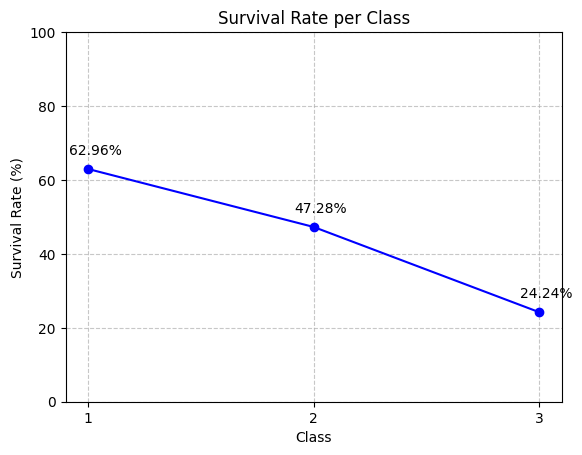

In [302]:
survival_rate = train.groupby('Pclass')['Survived'].mean() * 100
plt.plot(survival_rate.index, survival_rate, marker='o', linestyle='-', color='b')

plt.ylim(0, 100)

plt.grid(True, linestyle='--', alpha=0.7)

for x, y in zip(survival_rate.index, survival_rate):
    plt.text(x +0.03, y + 3, f'{y:.2f}%', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate per Class')

plt.xticks(survival_rate.index)

plt.show()


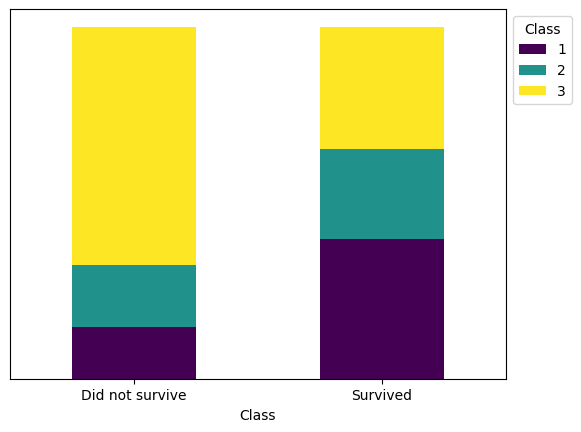

In [303]:
cross_tab = pd.crosstab(train['Survived'], train['Pclass'])

percentage_tab = cross_tab.div(cross_tab.sum(1).astype(int), axis=0)
ax = percentage_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Class')
plt.title('')

ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels(['Did not survive','Survived'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add legend
plt.legend(title='Class', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


In [304]:
y = train["Survived"]

features = ["Pclass", "Sex"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [305]:
submission = pd.read_csv('submission.csv')

submission.head()

,PassengerId,Survived
0,892,0.135447
1,893,0.500000
2,894,0.157407
3,895,0.135447
4,896,0.500000
